# Summary of the transcriptomic profile estimation

In [40]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import io
import glob

# Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 16

from matplotlib import colors as pltcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as patches

import sys
sys.path.append("../../scripts")
from util import returnValues
from noiseReductionMethodology import preprocessing

In [2]:
nListStr = np.hstack(["All", np.arange(6, 55, 6)[::-1]]).astype(str)
nListStr

array(['All', '54', '48', '42', '36', '30', '24', '18', '12', '6'],
      dtype='<U21')

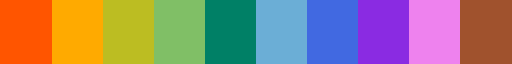

In [3]:
condition_color = np.hstack([
    [pltcolors.to_hex(plt.get_cmap("autumn", 4)(i + 1)) for i in range(2)],
    [pltcolors.to_hex("C8")],
    [pltcolors.to_hex(plt.get_cmap("summer", 3)(1 - i)) for i in range(2)],
    [pltcolors.to_hex(plt.get_cmap("Blues", 3)(i + 1)) for i in range(1)],
    [pltcolors.to_hex(a) for a in ["royalblue", "blueviolet", "violet", "sienna"]],
])


ListedColormap(condition_color)

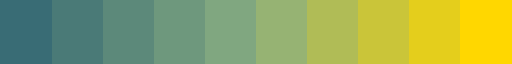

In [4]:
cm_nList = LinearSegmentedColormap.from_list('', ["#396C75", "#89AF82", "gold"], len(nListStr))
cm_nList

## [Fig. 3a and b] Transcriptomic profile estimation with the PCA-based procedure

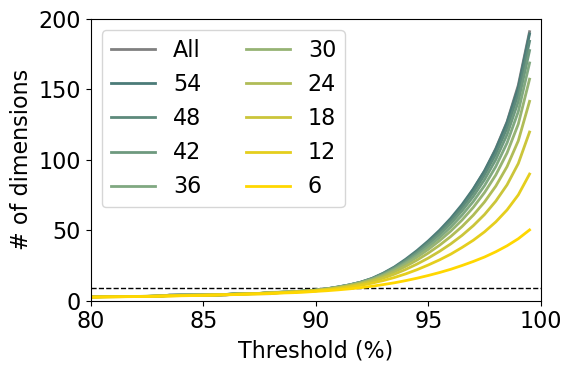

In [5]:
fig = plt.figure(figsize=(6, 4))

for i, n in enumerate(nListStr):
    if n == "All":
        OUT= pd.read_csv("../../results/SUMMARY_PERCENT_fixedDim_SPOMBE.csv", index_col=0) 
        color = "gray"
    else:
        OUT = pd.read_csv(f"../../results/SUMMARY_PERCENT_fixedDim_SPOMBE_dataSize{n}.csv", index_col=0)
        color = cm_nList(i)

    x = np.array([a.replace("%", "") for a in OUT.index]).astype(float)
    plt.plot(x, OUT["dim_PCA"], color=color, label=n, linewidth=2)

plt.hlines(9, 80, 100, color="k", linewidth=1, linestyle="dashed", zorder=0)
plt.xticks(range(80, 101, 5))
plt.xlim(80, 100)
plt.xlabel("Threshold (%)")
plt.yticks(range(0, 210, 50))
plt.ylim(0, 200)
plt.ylabel("# of dimensions")
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

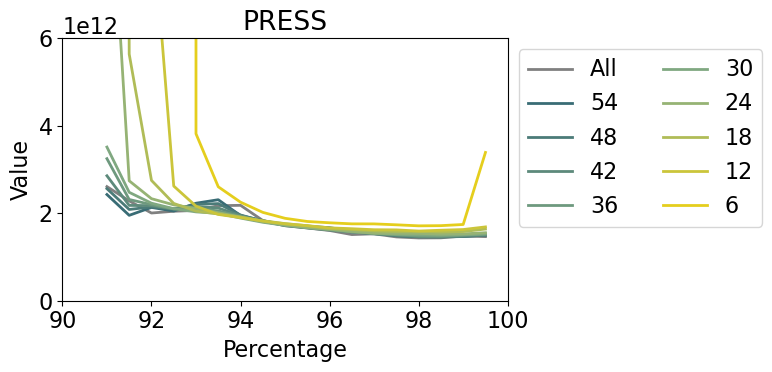

In [6]:
fig = plt.figure(figsize=(8, 4))

for i, n in enumerate(nListStr):
    if n == "All":
        OUT= pd.read_csv("../../results/SUMMARY_PERCENT_fixedDim_SPOMBE.csv", index_col=0)  
        color = "gray"
    else:
        OUT = pd.read_csv(f"../../results/SUMMARY_PERCENT_fixedDim_SPOMBE_dataSize{n}.csv", index_col=0)
        color = cm_nList(i - 1)


    OUT_ = OUT[OUT[f"dim_PCA"] >= 9].copy()
    x = np.array([a.replace("%", "") for a in OUT_.index]).astype(float)
    
    idx = np.argmin(OUT_["PRESS_PCA"].values)
    plt.plot(x, OUT_["PRESS_PCA"], color=color, linewidth=2, label=n)

plt.xticks(range(90, 101, 2))
plt.xlim(90, 100)
plt.yticks(np.arange(0, 6.1, 2) * 1e12)
plt.ylim(0, 6e12)
plt.xlabel("Percentage")
plt.ylabel("Value")
plt.title("PRESS")
plt.legend(ncol=2, loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## [Fig. 3c and d] Threshold with the best PRESS performance

In [49]:
SUMMARY_PERCENTAGE_fixedDim = pd.DataFrame([])

for n in nListStr:
    if n == "All":
        OUT= pd.read_csv("../../results/SUMMARY_PERCENT_fixedDim_SPOMBE.csv", index_col=0).sort_values(["PRESS_PCA"]).reset_index(drop=False).loc[[0], :]

    else:
        OUT = pd.read_csv(f"../../results/SUMMARY_PERCENT_fixedDim_SPOMBE_dataSize{n}.csv", index_col=0).sort_values(["PRESS_PCA"]).reset_index(drop=False).loc[[0], :]
    
    OUT["sampleSize"] = n
    SUMMARY_PERCENTAGE_fixedDim = pd.concat([SUMMARY_PERCENTAGE_fixedDim, OUT], axis=0, ignore_index=True)
    
SUMMARY_PERCENTAGE_fixedDim.head()

index  dim_PCA  percent_NRM     PRESS_PCA     PRESS_NRM    PRESS_diff  \
0  98.0%   108.00    98.269430  1.435394e+12  1.432007e+12 -3.386932e+09   
1  98.5%   126.42    98.714899  1.462947e+12  1.459305e+12 -3.642631e+09   
2  98.5%   122.59    98.749078  1.458136e+12  1.454005e+12 -4.130623e+09   
3  98.5%   117.94    98.793087  1.460504e+12  1.457276e+12 -3.228314e+09   
4  98.5%   112.02    98.854181  1.476064e+12  1.471955e+12 -4.108903e+09   

   PRESS_PCA_c1  PRESS_PCA_c2  PRESS_PCA_c3  PRESS_PCA_c4  ...  cosine_diff  \
0  2.030976e+10  2.566407e+10  7.113794e+11  1.897653e+11  ...     0.000072   
1  2.038447e+10  2.122209e+10  7.273618e+11  1.965846e+11  ...     0.000052   
2  2.045627e+10  2.110101e+10  7.230088e+11  1.982276e+11  ...     0.000078   
3  2.100351e+10  2.089207e+10  7.243926e+11  2.001424e+11  ...     0.000014   
4  2.121164e+10  2.104084e+10  7.330526e+11  2.039690e+11  ...     0.000046   

   sampleSize  dim_PCA_std  percent_NRM_std  PRESS_PCA_std  PRESS_NRM_std  \
0         All          NaN              NaN            NaN            NaN   
1          54     0.929301         0.005446   6.931362e+10   7.017646e+10   
2          48     1.241733         0.006211   8.977015e+10   9.136614e+10   
3          42     1.508774         0.005816   9.869275e+10   1.007011e+11   
4          36     1.838369         0.006500   1.243548e+11   1.273407e+11   

   PRESS_diff_std    PRESS_pVal  cosine_diff_std   cosine_pVal  
0             NaN           NaN              NaN           NaN  
1    1.859572e+09  5.486894e-17         0.000078  9.964477e-11  
2    5.513355e+09  1.043665e-15         0.000249  8.214827e-06  
3    4.726976e+09  3.883375e-11         0.000236  3.321214e-03  
4    4.433664e+09  7.794993e-12         0.000166  3.874622e-03  

[5 rows x 38 columns]

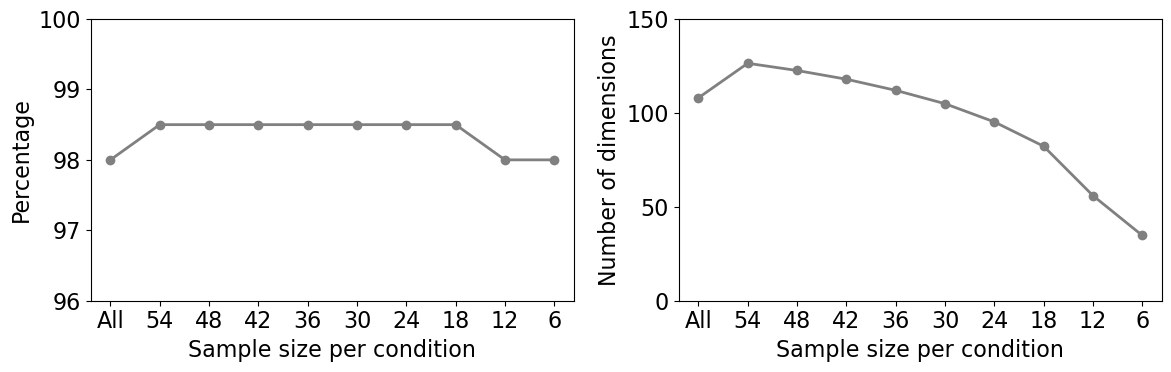

In [8]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 2, 1)
plt.plot([float(a.replace("%", "")) for a in SUMMARY_PERCENTAGE_fixedDim["index"].values], 
         color="gray", linewidth=2, marker="o")

plt.xticks(range(len(nListStr)), nListStr)
plt.xlim(-0.4, len(nListStr) - 1 + 0.4)
plt.xlabel("Sample size per condition")
plt.ylim(96, 100)
plt.ylabel("Percentage")


ax = fig.add_subplot(1, 2, 2)
mean = SUMMARY_PERCENTAGE_fixedDim["dim_PCA"].values
std = SUMMARY_PERCENTAGE_fixedDim["dim_PCA_std"].values
plt.plot(range(len(mean)), mean, color="gray", linewidth=2, marker="o")

plt.xticks(range(len(nListStr)), nListStr)
plt.xlim(-0.4, len(nListStr) - 1 + 0.4)
plt.yticks(np.arange(0, 151, 50))
plt.xlabel("Sample size per condition")
plt.ylabel("Number of dimensions")

plt.tight_layout()
plt.show()

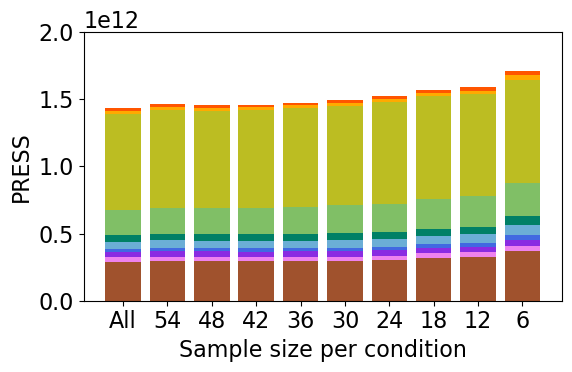

In [9]:
plt.figure(figsize=(6, 4))

out = SUMMARY_PERCENTAGE_fixedDim.loc[:, [f"PRESS_PCA_c{i + 1}" for i in range(10)]].values

for i, data in enumerate(out):
    for j, c in enumerate(condition_color):
        plt.bar(i, data[j], bottom=data[j+1:].sum(), color=c, linewidth=0)

plt.xticks(range(len(nListStr)), nListStr)
plt.yticks(np.arange(0, 2.1, 0.5) * 1e12)
plt.ylim(0, 2e12)
plt.xlabel("Sample size per condition")
plt.ylabel("PRESS")
plt.tight_layout()
plt.show()

## [Fig. 3e and f] Differences in Raman intensities and transcriptomic profiles among conditions

In [10]:
RAMAN = pd.read_csv("../../data/RAMAN_FINGERPRINT.csv")
RAMAN_PROCESSED = preprocessing(RAMAN)
MEAN = RAMAN_PROCESSED.groupby("label").mean()
TRANSCRIPTOME = pd.read_csv("../../data/TRANSCRIPTOME.csv")

In [11]:
conditionNum = MEAN.shape[0]

In [12]:
raman_diffList_both = np.zeros((conditionNum, conditionNum)) - 1
for i in range(conditionNum):
    for j in range(i + 1, conditionNum):
        diff = ((MEAN.values[i, :] - MEAN.values[j, :]) ** 2).sum()
        raman_diffList_both[j, i] = diff
        raman_diffList_both[i, j] = diff

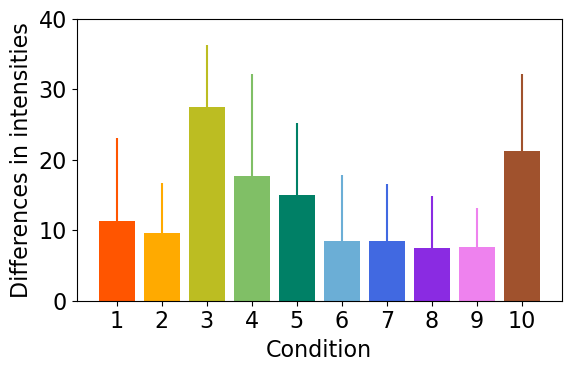

In [13]:
plt.figure(figsize=(6, 4))
mean = [a[(a > 0)].mean() for a in raman_diffList_both]
std = [a[(a > 0)].std() for a in raman_diffList_both]

for i, (a, b, c) in enumerate(zip(mean, std, condition_color)):
    plt.bar(i, a, color=c, linewidth=2)
    plt.errorbar(i, a, yerr=b, fmt="none", color=c)

plt.xticks(range(conditionNum), np.arange(conditionNum) + 1)
plt.yticks(range(0, 41, 10))
plt.ylim(0, 40)
plt.xlabel("Condition")
plt.ylabel("Differences in intensities")
plt.tight_layout()
plt.show()

In [14]:
transcript_diffList_both = np.zeros((conditionNum, conditionNum)) - 1
for i in range(conditionNum):
    for j in range(i + 1, conditionNum):
        diff = ((returnValues(TRANSCRIPTOME)[i, :] - returnValues(TRANSCRIPTOME)[j, :]) ** 2).sum()
        transcript_diffList_both[j, i] = diff
        transcript_diffList_both[i, j] = diff

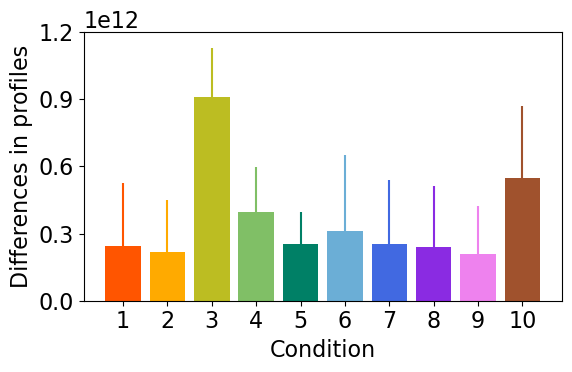

In [15]:
plt.figure(figsize=(6, 4))
mean = [a[(a > 0)].mean() for a in transcript_diffList_both]
std = [a[(a > 0)].std() for a in transcript_diffList_both]

for i, (a, b, c) in enumerate(zip(mean, std, condition_color)):
    plt.bar(i, a, color=c, linewidth=2)
    plt.errorbar(i, a, yerr=b, fmt="none", color=c)
    
plt.xticks(range(conditionNum), np.arange(conditionNum) + 1)
plt.xlabel("Condition")
plt.yticks(np.arange(0, 1.21, 0.3) * 1e12)
plt.ylabel("Differences in profiles")
plt.ylim(0, 1.2e12)
plt.tight_layout()
plt.show()

## Evaluation of the power of transcriptomic profile estimation

To generate the required compariosn data for each sample size, please run the following command-line scripts:

```bash
python comparison.py -n 54 --cutMode percent --cutRange 98.5 -o ../results/comparisonDataSize/SPOMBE_n54_percent985.csv -p_r ../data/RAMAN_FINGERPRINT.csv -p_t ../data/TRANSCRIPTOME.csv

python comparison.py -n 48 --cutMode percent --cutRange 98.5 -o ../results/comparisonDataSize/SPOMBE_n48_percent985.csv -p_r ../data/RAMAN_FINGERPRINT.csv -p_t ../data/TRANSCRIPTOME.csv

python comparison.py -n 42 --cutMode percent --cutRange 98.5 -o ../results/comparisonDataSize/SPOMBE_n42_percent985.csv -p_r ../data/RAMAN_FINGERPRINT.csv -p_t ../data/TRANSCRIPTOME.csv

python comparison.py -n 36 --cutMode percent --cutRange 98.5 -o ../results/comparisonDataSize/SPOMBE_n36_percent985.csv -p_r ../data/RAMAN_FINGERPRINT.csv -p_t ../data/TRANSCRIPTOME.csv

python comparison.py -n 30 --cutMode percent --cutRange 98.5 -o ../results/comparisonDataSize/SPOMBE_n30_percent985.csv -p_r ../data/RAMAN_FINGERPRINT.csv -p_t ../data/TRANSCRIPTOME.csv

python comparison.py -n 24 --cutMode percent --cutRange 98.5 -o ../results/comparisonDataSize/SPOMBE_n24_percent985.csv -p_r ../data/RAMAN_FINGERPRINT.csv -p_t ../data/TRANSCRIPTOME.csv

python comparison.py -n 18 --cutMode percent --cutRange 98.5 -o ../results/comparisonDataSize/SPOMBE_n18_percent985.csv -p_r ../data/RAMAN_FINGERPRINT.csv -p_t ../data/TRANSCRIPTOME.csv

python comparison.py -n 12 --cutMode percent --cutRange 98.0 -o ../results/comparisonDataSize/SPOMBE_n12_percent980.csv -p_r ../data/RAMAN_FINGERPRINT.csv -p_t ../data/TRANSCRIPTOME.csv

python comparison.py -n 6 --cutMode percent --cutRange 98.0 -o ../results/comparisonDataSize/SPOMBE_n6_percent980.csv -p_r ../data/RAMAN_FINGERPRINT.csv -p_t ../data/TRANSCRIPTOME.csv

```

You can regenerate the command-line scripts for evaluation using the following Python snippet:

```python
for per, n in SUMMARY_PERCENTAGE_fixedDim.loc[:, ["index", "sampleSize"]].values[1:, :]:
    per = float(per.replace("%", ""))
    perThr = f"{per:.1f}".replace(".", "")
    out = f"python comparison.py -n {n} --cutMode percent --cutRange {per} -o ../results/comparisonDataSize/SPOMBE_n{n}_percent{perThr}.csv -p_r ../data/RAMAN_FINGERPRINT.csv -p_t ../data/TRANSCRIPTOME.csv"
    print(out)    
```

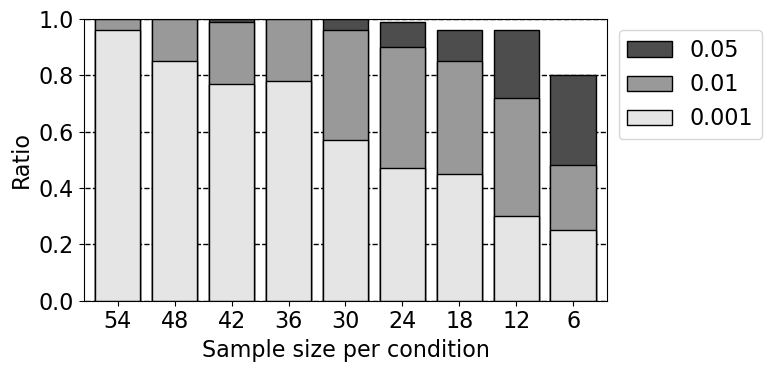

In [47]:
plt.figure(figsize=(8, 4))

for i, n in enumerate(nListStr):
    
    if n == "All":
        continue
    
    OUT = pd.read_csv(glob.glob(f"../../results/comparisonDataSize/SPOMBE_n{n}_percent*.csv")[0])
    color = cm_nList(i - 1)

    pList = OUT[OUT["mode"] == "PCA"]["p"].values        
    data = [(pList < a).mean() for a in [0.05, 0.01, 0.001]]
    for k, val in enumerate(data):
        plt.bar(i, val, 
                color=np.ones(3) * (k + 1) * 0.3, linewidth=1, edgecolor="k")
        
plt.hlines(np.arange(0, 1.1, 0.2), -1, len(nListStr), color="k", linewidth=1, linestyle="dashed", zorder=0)

plt.xticks(range(len(nListStr)), nListStr)
plt.xlim(1 - 0.6, len(nListStr) - 1 + 0.6)
plt.xlabel("Sample size per condition")
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(0, 1)
plt.ylabel("Ratio")

patchList = [patches.Patch(facecolor=np.ones(3) * (i + 1) * 0.3, label=a, edgecolor="k") for i, a in enumerate([0.05, 0.01, 0.001])]
plt.legend(handles=patchList, loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()